# 1 Modelling the external data
## Case a) Mixed reflectance and thermal emission, constrained EV

**Author:** Hannu Parviainen<br>
**Last edited:** 21.11.2021

Here we model the KELT-1 light curves observed with TESS (Beatty20, XX20), LBT (Beatty), and Spitzer (Beatty2019, Beatty2017) using a full phase curve model that includes the transit, secondary eclipse, thermal emission, reflection, ellipsoidal variations and Doppler boosting. 

The model is implemented by `src.priordatalpf.JointLPF`, which inherits all its functionality from `pytransit.lpf.PhaseCurveLPF`.

In this base case we don't constrain the geometric albedo or the planet's day-side flux ratio (we do this in the later cases). These two parameters should be linearly correlated since they are the main parameters affecting the eclipse depth, but it is useful to see their joint posterior.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from corner import corner
from src import JointLPF
from src.priordatalpf import plot_joint_lcs

In [3]:
lpf = JointLPF('a') #, downsampling=dict(tess=10, lbt=10, croll=10, spitzer=10))

Global optimisation:   0%|          | 0/45000 [00:00<?, ?it/s]

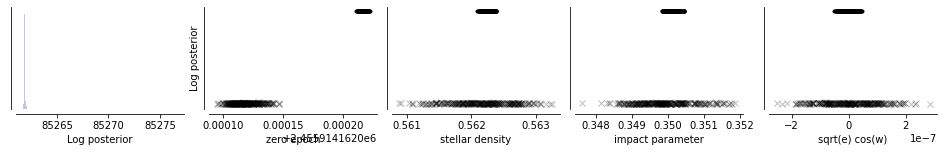

In [12]:
lpf.optimize_global(45000, 300)

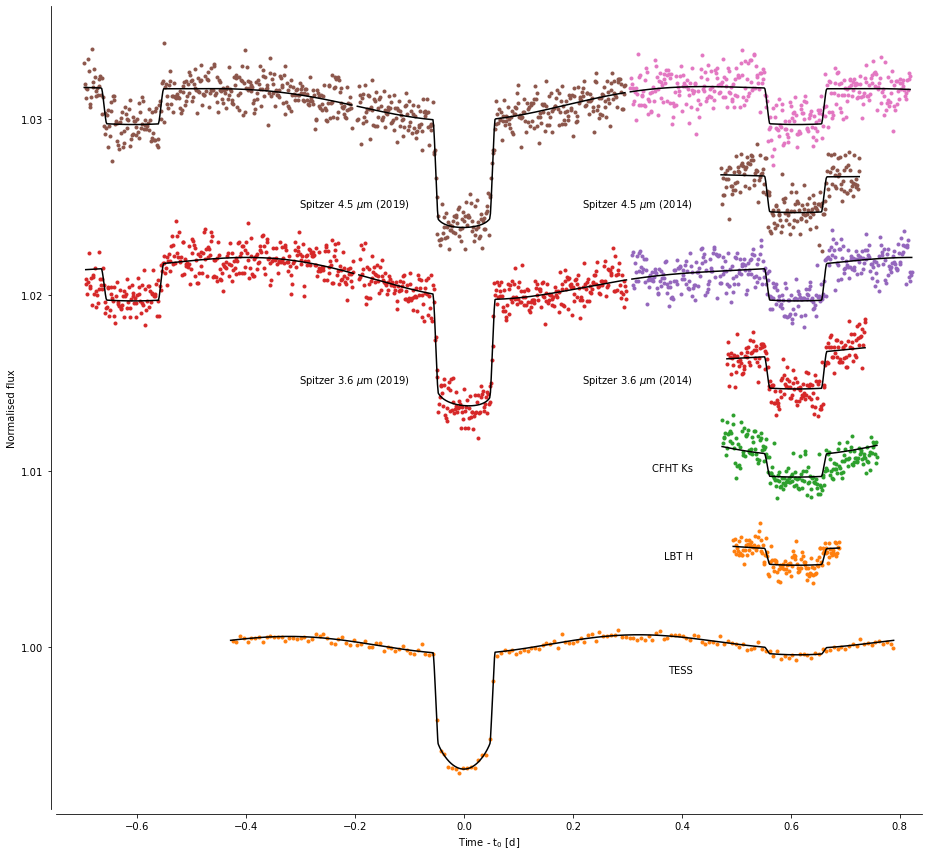

In [14]:
plot_joint_lcs(lpf);

In [6]:
from src.kelt1 import read_mcmc
df = read_mcmc('results/01a_ext_emission_and theoretical_ev.nc')
sids = permutation(df.values.shape[0])[:lpf.de.n_pop]
starting_population = df.values[sids, :-1].copy()
lpf.sample_mcmc(500, thin=10, repeats=1, save=True, population=starting_population)

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/500 [00:00<?, ?it/s]

In [7]:
lpf.sample_mcmc(5000, thin=50, repeats=8, save=True)

MCMC sampling:   0%|          | 0/8 [00:00<?, ?it/s]

Run 1/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 4/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 5/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 6/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 7/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 8/8:   0%|          | 0/5000 [00:00<?, ?it/s]

In [23]:
lpf.sample_mcmc(5000, thin=50, repeats=3, save=True)

MCMC sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Run 1/3:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/3:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/3:   0%|          | 0/5000 [00:00<?, ?it/s]

In [15]:
df = lpf.posterior_samples(derived_parameters=False)

In [16]:
df

tc         p       rho         b          secw          sesw  \
0      2.455914e+06  1.217494  0.554860  0.360934 -2.885929e-07 -2.951063e-07   
1      2.455914e+06  1.217494  0.551783  0.363862 -9.662236e-09 -2.915933e-07   
2      2.455914e+06  1.217494  0.545849  0.371295  1.006536e-07 -5.261247e-07   
3      2.455914e+06  1.217494  0.547078  0.368393 -2.296097e-07 -2.999280e-07   
4      2.455914e+06  1.217494  0.550070  0.364074 -1.097335e-07 -3.230083e-07   
...             ...       ...       ...       ...           ...           ...   
29995  2.455914e+06  1.217494  0.560106  0.351424 -1.334098e-06 -2.241923e-07   
29996  2.455914e+06  1.217494  0.560772  0.350293 -1.281106e-06 -2.537295e-07   
29997  2.455914e+06  1.217494  0.560772  0.350293 -1.281106e-06 -2.537295e-07   
29998  2.455914e+06  1.217494  0.567247  0.337538 -1.344156e-06 -3.717720e-07   
29999  2.455914e+06  1.217494  0.568809  0.334089 -1.517087e-06 -4.920707e-07   

             k2           oev  aev_TESS  adb_TESS  ...  lm_s__0_4  lm_s__0_5  \
0      0.005859 -1.794128e-07  0.000464  0.000042  ...   0.001726  -0.000872   
1      0.005863 -2.239194e-07  0.000465  0.000043  ...   0.001680  -0.000887   
2      0.005886 -2.053093e-07  0.000456  0.000043  ...   0.001764  -0.000818   
3      0.005880 -2.041153e-07  0.000456  0.000043  ...   0.001698  -0.000852   
4      0.005865 -2.234424e-07  0.000462  0.000042  ...   0.001713  -0.000845   
...         ...           ...       ...       ...  ...        ...        ...   
29995  0.005943 -6.011855e-08  0.000437  0.000046  ...   0.001799  -0.000761   
29996  0.005942 -5.902832e-08  0.000437  0.000046  ...   0.001800  -0.000761   
29997  0.005942 -5.902832e-08  0.000437  0.000046  ...   0.001800  -0.000761   
29998  0.005920 -4.991441e-08  0.000439  0.000045  ...   0.001806  -0.000764   
29999  0.005926 -5.777392e-08  0.000439  0.000046  ...   0.001769  -0.000803   

       lm_s__0_6   lm_i__0  lm_s__0_1  lm_s__0_2  lm_s__0_3  lm_s__0_4  \
0       0.000383  0.998108  -0.002315  -0.001275   0.000297   0.001114   
1       0.000348  0.998220  -0.001988  -0.001143   0.000431   0.001157   
2       0.000388  0.998685  -0.001223  -0.000726   0.000401   0.001196   
3       0.000361  0.998708  -0.001065  -0.000652   0.000489   0.001185   
4       0.000367  0.998615  -0.001269  -0.000767   0.000448   0.001178   
...          ...       ...        ...        ...        ...        ...   
29995   0.000655  0.998968   0.000636  -0.000199   0.001107   0.001813   
29996   0.000654  0.998963   0.000626  -0.000200   0.001109   0.001809   
29997   0.000654  0.998963   0.000626  -0.000200   0.001109   0.001809   
29998   0.000634  0.998931   0.000489  -0.000281   0.001054   0.001818   
29999   0.000610  0.999009   0.000696  -0.000184   0.001113   0.001841   

       lm_s__0_5  lm_s__0_6  
0      -0.000779   0.000284  
1      -0.000801   0.000327  
2      -0.000780   0.000344  
3      -0.000785   0.000342  
4      -0.000762   0.000334  
...          ...        ...  
29995  -0.000983   0.000646  
29996  -0.000981   0.000644  
29997  -0.000981   0.000644  
29998  -0.000957   0.000650  
29999  -0.000952   0.000660  

[30000 rows x 129 columns]

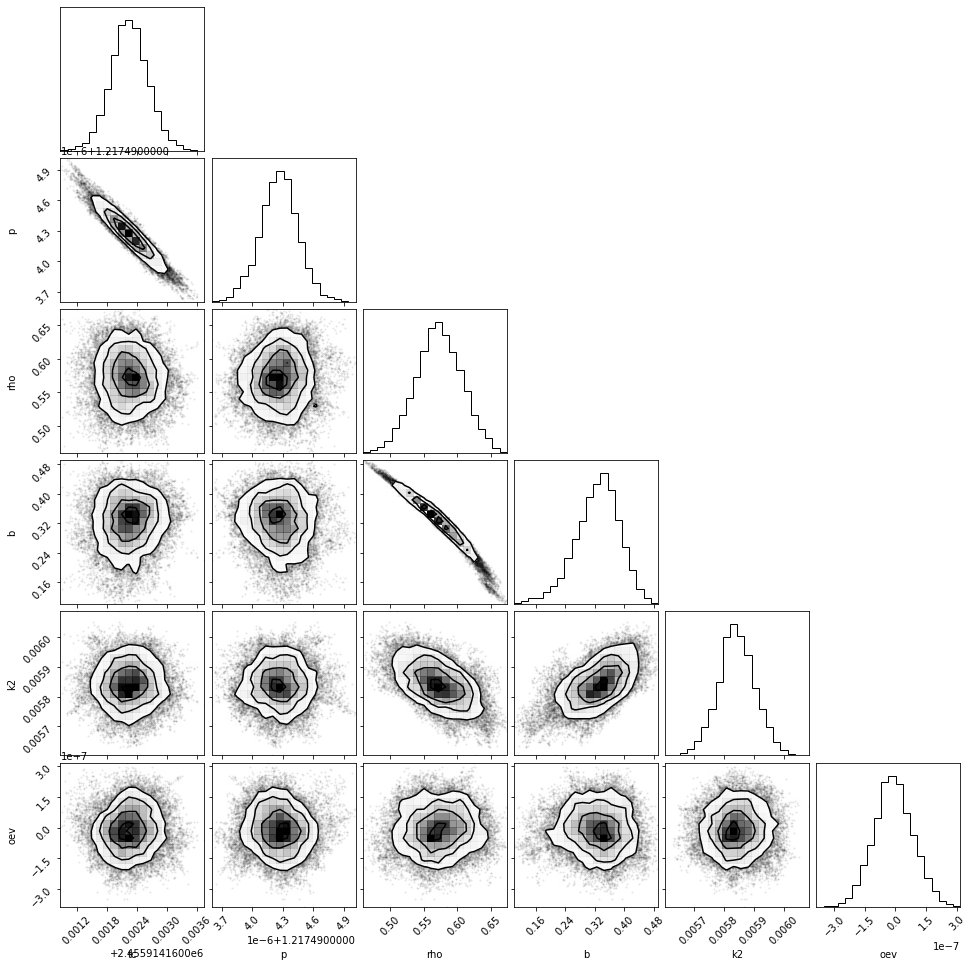

In [17]:
corner(df.iloc[:,[0,1,2,3,6,7]]);

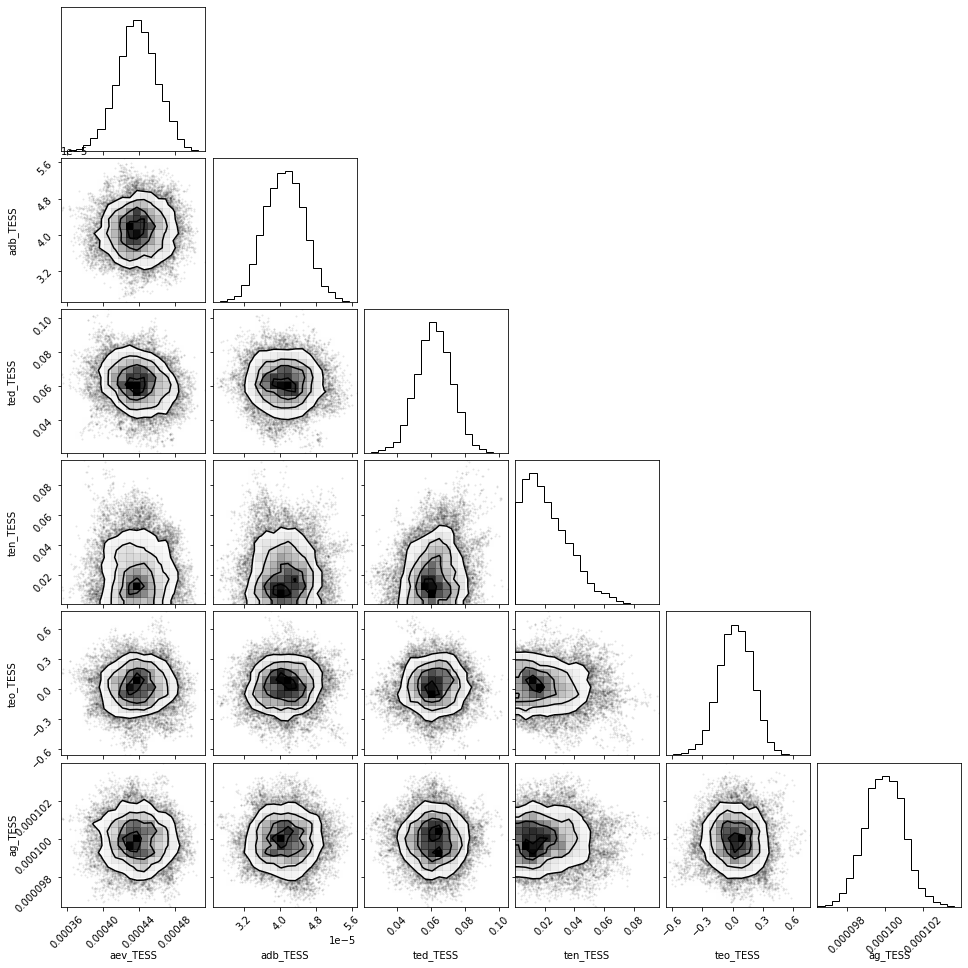

In [19]:
corner(df.iloc[:,8:14]);

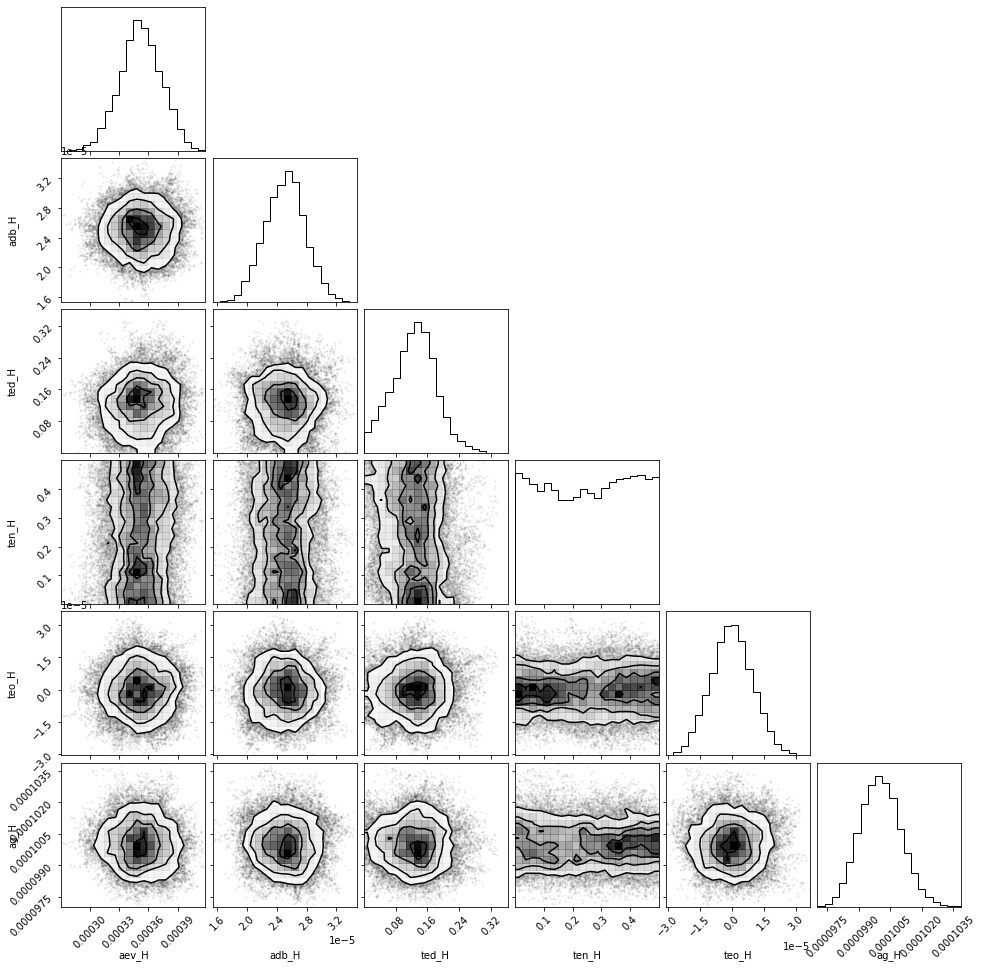

In [20]:
corner(df.iloc[:,14:20]);

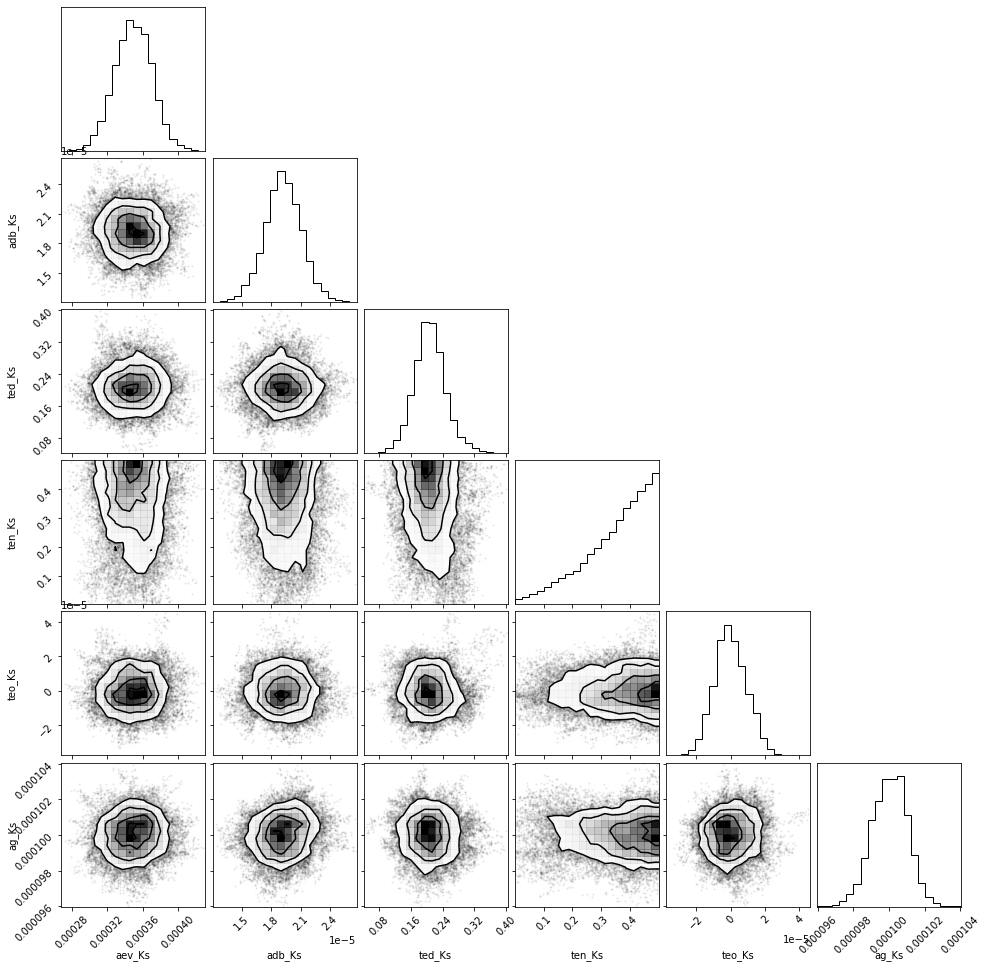

In [21]:
corner(df.iloc[:,20:26]);

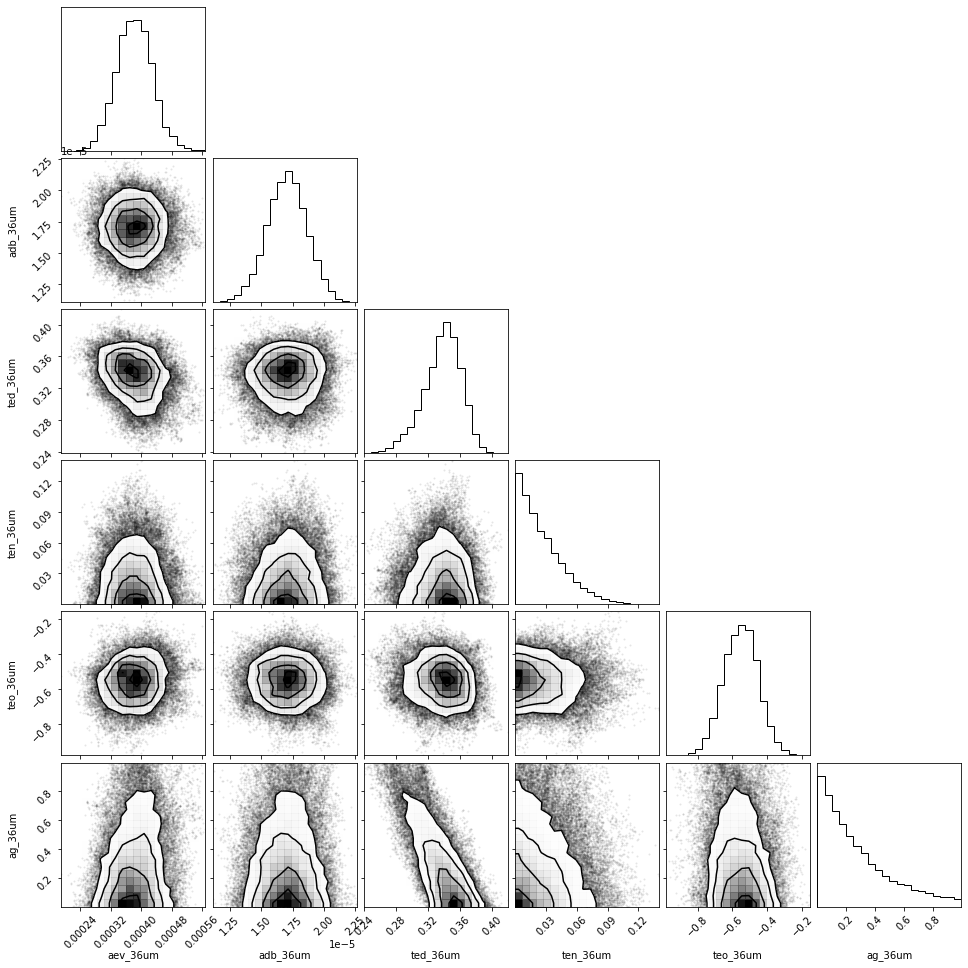

In [26]:
corner(df.iloc[:,26:32]);

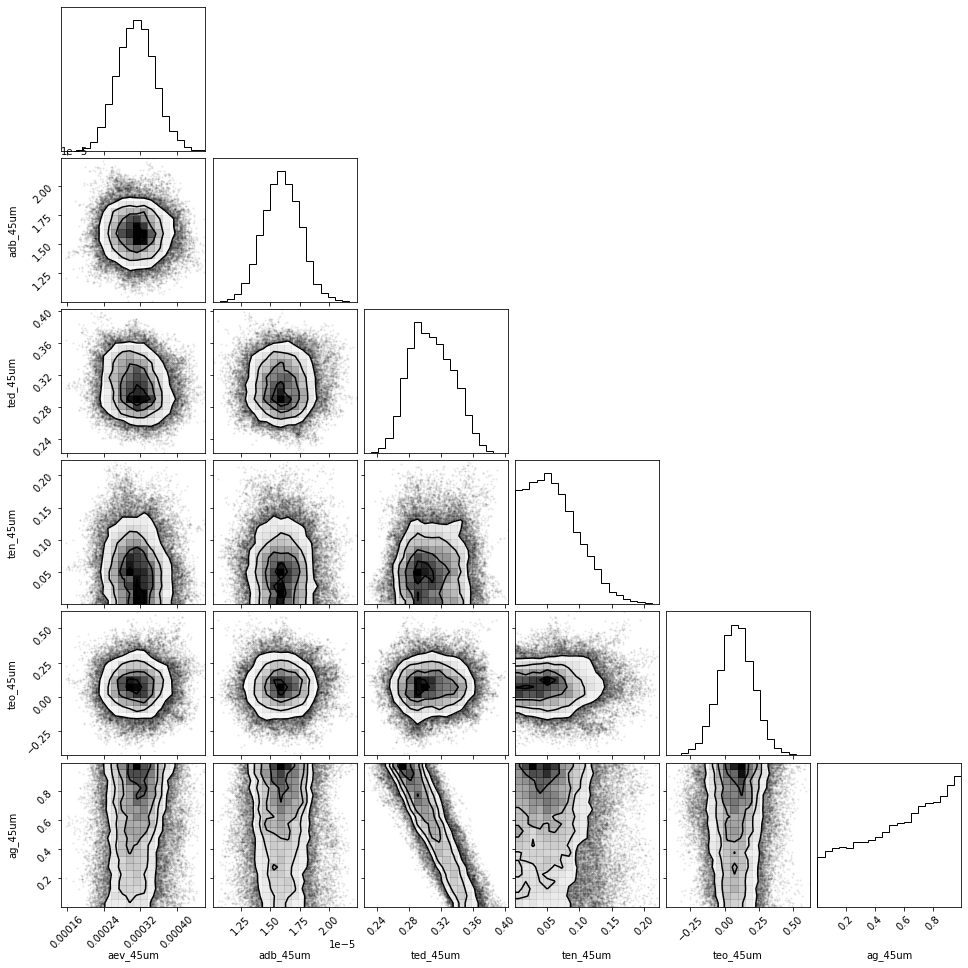

In [27]:
corner(df.iloc[:,32:38]);

---

<center>&copy 2021 Hannu Parviainen</center>